In [56]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer

The first step we carried out was to import the data and check if the data is clean. 
1. Import the data and view the imported data
2. The data is clean and no columns are missing any values. 
3. All column entries except date column are the right datatype we want it to be. 
4. We converted the date column to datetime datatype.

In [57]:
#import the house data and view the imported data
house_data = pd.read_csv('https://raw.githubusercontent.com/Pelumioluwa/MBAN6110Class/main/Data/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
#check the information of the data see if it is clean
house_data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [59]:
#convert the date cloumn to datetime type 
house_data['date'] = pd.to_datetime(house_data['date'])

In [60]:
#check the summary of the columns
house_data['zipcode'].describe(include='all',datetime_is_numeric=True)

count    21613.000000
mean     98077.939805
std         53.505026
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

The second step is to determine which of these columns have the strong correlation with price. To build a good preditctor, we would consider correlations which are moderate to strong (0.3 - 1). 

Therefore our independent variables are (square foot living, quality grade of materials, workmanship used, square foot of above the basement,Average size of interior housing living space for the closest 15 house, number of bathrooms,view, square foot of the basement, number of bedrooms). 

Although we received equal to or below 0.3 relationship for latitude,longtitude and zipcode. We would ignore this correlation as independently they do not say much but we would get a better view of the correlation with price when considered together.

In [61]:
# Calculate the correlation coefficients with the "Price" column
rel_correlation = house_data.corr()['price'].drop('price')
# Sort the correlations in descending order
strong_correlation = rel_correlation.abs().sort_values(ascending=False)

# Print the columns with the strongest relationships to "Price"
print(strong_correlation)

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64


The third step is to visualize our data distribution. Through visualization, we are able to see what kind of relationship the other columns have with price and also If there are any outliers we should consider in these columns. Therefore, we would visualize the columns with the strong correlations against price. 
1. Price and square foot living 
2. Price and quality grade of materials, workmanship used 
3. Price and square foot of above the basement
4. Price and average size of interior housing living space for the closest 15 house
5. Price and number of bathrooms
6. Price and view
7. Price and square foot of the basement
8. Price number of bedrooms


Text(0.5, 1.0, 'Price vs Size_of_living_area_in_square_feet')

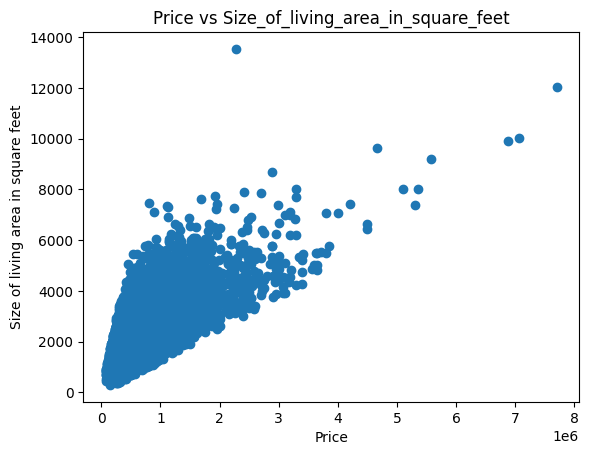

In [62]:
#price against number of size of living area in square feet
plt.scatter(house_data.price,house_data.sqft_living)
plt.xlabel('Price')
plt.ylabel('Size of living area in square feet')
plt.title("Price vs Size_of_living_area_in_square_feet")
# We can see that as the size of living area in square feet increases, price increase. 
# Therefore the size of living area in square feet positively affects the price of a house.
# There is an outlier in the data, but we would keep it in as it is not an outlier in the other data column

Text(0.5, 1.0, 'Price vs Quality grade')

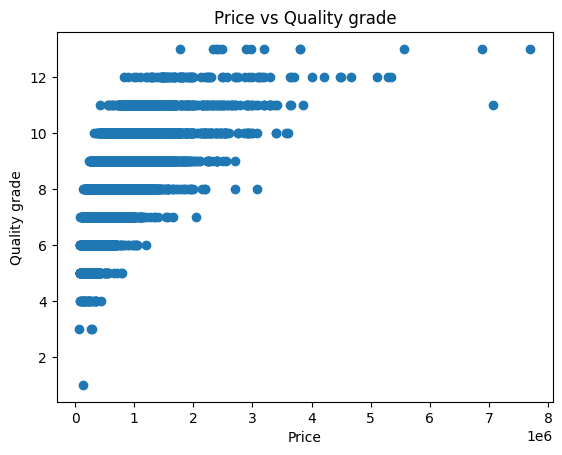

In [63]:
#price against quality grade of materials, workmanship used 
plt.scatter(house_data.price,house_data.grade)
plt.xlabel('Price')
plt.ylabel('Quality grade')
plt.title("Price vs Quality grade")
# We can see that as the quality grade, price increase. 
# Therefore the quality grade affects the price of a house.


Text(0.5, 1.0, 'Price vs sqft of above the basement')

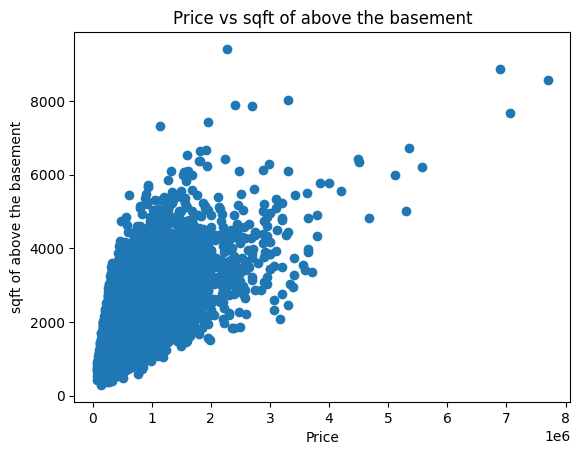

In [64]:
#price against square foot of above the basement 
plt.scatter(house_data.price,house_data.sqft_above)
plt.xlabel('Price')
plt.ylabel('sqft of above the basement')
plt.title("Price vs sqft of above the basement")
# We can see that as the size of area above the basement increases, price increase. 
# Therefore the size of area above the basement positively affects the price of a house.
# There are some outliers in the data, but we would keep them in as they are not outliers in the other data column


Text(0.5, 1.0, 'Price vs Sqft living space of closest 15 houses')

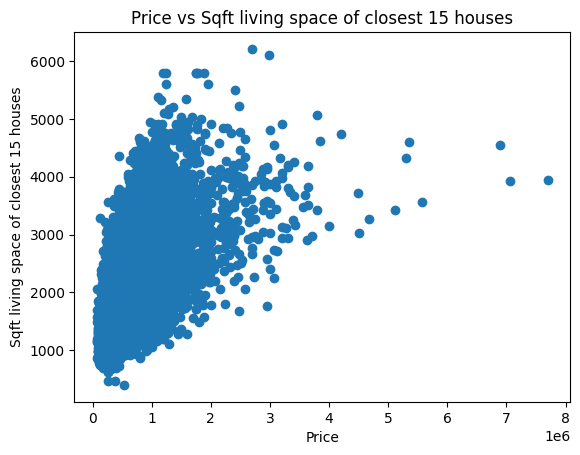

In [65]:
#price against average size of interior housing living space for the closest 15 house
plt.scatter(house_data.price,house_data.sqft_living15)
plt.xlabel('Price')
plt.ylabel('Sqft living space of closest 15 houses')
plt.title("Price vs Sqft living space of closest 15 houses")
# We can see that as the average size of living space of the closest 15 houses increases, price increase. 
# Therefore the average size of living space of the closest 15 houses positively affects the price of a house.
# There are some outliers in the data, but we would keep them in as they are not outliers in the other data column


Text(0.5, 1.0, 'Price vs number of bathrooms')

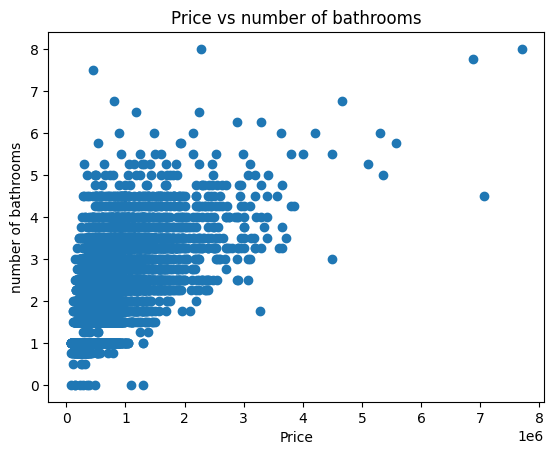

In [66]:
#price against number of bathrooms
plt.scatter(house_data.price,house_data.bathrooms)
plt.xlabel('Price')
plt.ylabel('number of bathrooms')
plt.title("Price vs number of bathrooms")
# We can see that as the number of bathrooms increases, price increase. 
# Therefore the number of bathrooms positively affects the price of a house.
# There are some outliers in the data, but we would keep them in as they are not outliers in the other data column


Text(0.5, 1.0, 'Price vs view')

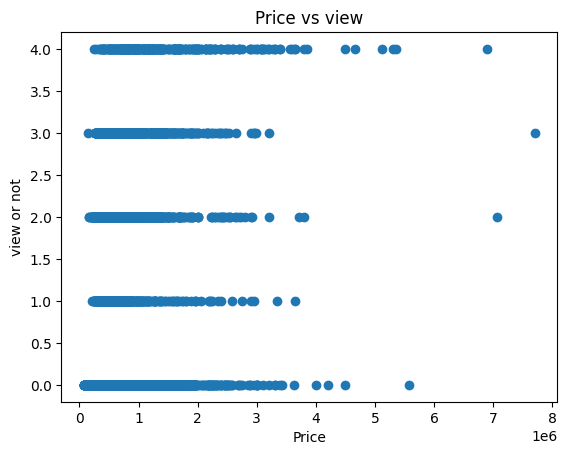

In [67]:
#price against the view
plt.scatter(house_data.price,house_data.view)
plt.xlabel('Price')
plt.ylabel('view or not')
plt.title("Price vs view")
# We can see that there is a relationship and the view positively affects the price of a house.


Text(0.5, 1.0, 'Price vs sqft of the basement')

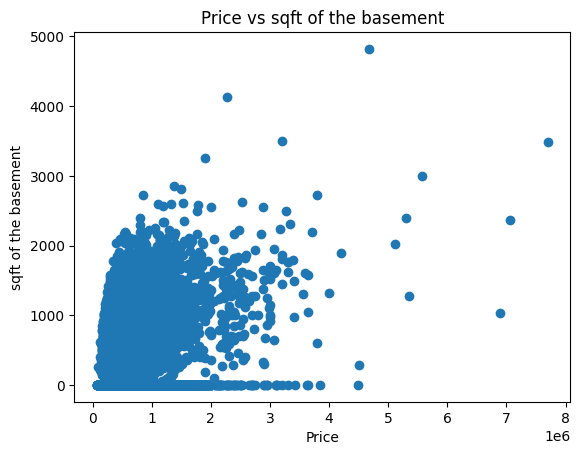

In [68]:
#price against square foot of the basement 
plt.scatter(house_data.price,house_data.sqft_basement)
plt.xlabel('Price')
plt.ylabel('sqft of the basement')
plt.title("Price vs sqft of the basement")
# We can see that as the size of the basement increases, price increase. 
# Therefore the size of the basement positively affects the price of a house.
# There are some outliers in the data, but we would keep them in as they are not outliers in the other data column


Text(0.5, 1.0, 'Price vs Number_of_bedrooms')

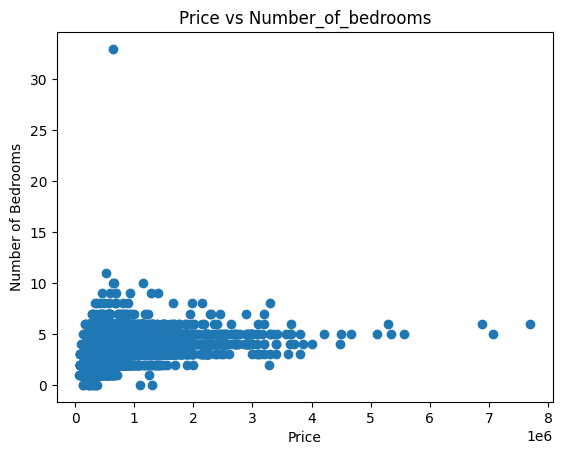

In [69]:
#price against number of bedrooms
plt.scatter(house_data.price,house_data.bedrooms)
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')
plt.title("Price vs Number_of_bedrooms")
# We can see there is a positive relationship with the number of bedroom and price
# however, the relationship is not strong 
# There are some outliers in the data, but we would keep them in as they are not outliers in the other data column

Text(0.5, 1.0, 'Longtitude vs Latitude')

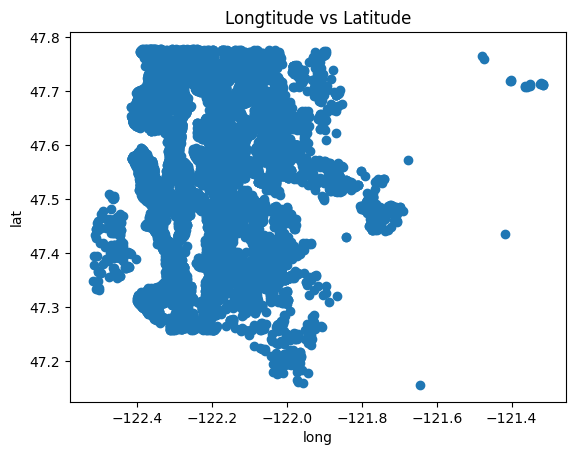

In [70]:
#longtitude and Latitude to get the a visual of the location of the houses
plt.scatter(house_data.long,house_data.lat)
plt.xlabel('long')
plt.ylabel('lat')
plt.title("Longtitude vs Latitude")
# It shows that the houses are closely located to one another

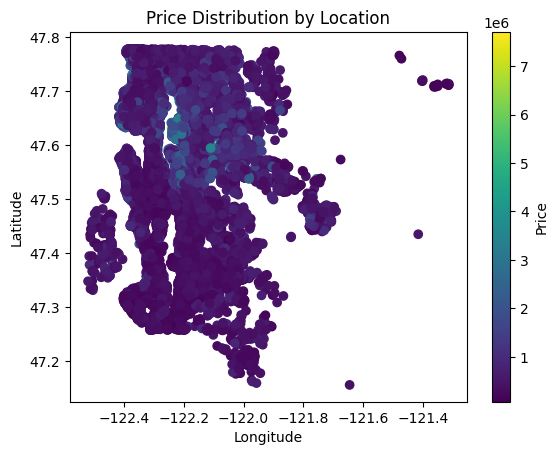

In [71]:
#let consider how the above affects price 
#so we would plot the longtitude and latitude against price 
plt.scatter(house_data['long'], house_data['lat'], c=house_data['price'], cmap='viridis')
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Distribution by Location')
plt.show()
 # From the below it shows there is a strong relationship among the price, longtitude and latitude
 # most houses in a particular location are priced similar and we can see 
 # some segmented neighbourhoods that are in the midst of the cluster that are priced more
 # There are some outlier houses but we would not remove them because they are not outliers in other data columns
 

The Fourth step would be to carry out Feature engineering 
We would carry out feature engineering on the following columns.
Year of renovation to determine if a house has been renovated or not
longtitude, latitude and zipcode to determine the location of a house. 

From the above we would be able to determine the below
1. if a house has been renovated affects the price
   From the below, we recevied a correlation of .12 between price and renovated. This means that though a house was newly renovated, it did not have much effect on the price of the house.
2. if the location of a house affects the price. To use both the longtitude and latitude as 
   a single independent variable, we represented them in a xy plane. Then calculated the angle between the positive x-axis and the point. This angle represents our new variable (lat_long_ang). We received a correlation of between price and the longtitude and latitude angle as .308
   

In [72]:
# Create function to classify if a house has been renovated or not
def renovate_cat(x):
    if x == 0:
        return '0'
    else:
        return '1'

In [73]:
# Create new column with year of renovation using renovate_cat()to categorize if a house has 
#been renovated or not
house_data['renovated'] = house_data['yr_renovated'].apply(renovate_cat)
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


In [74]:
#convert the renovated cloumn to int type 
house_data['renovated'] =house_data['renovated'].astype(int)
print(house_data.dtypes)


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
renovated                 int64
dtype: object


In [75]:
# Calculate the correlation between 'price' and 'renovated'
correlation = house_data['price'].corr(house_data['renovated'])
print(correlation)


0.12609226271139498


In [80]:
# Calculate the angle (in degrees) based on X and Y coordinates
house_data['lat_long_ang'] = np.arctan2(house_data['long'], house_data['lat'])
house_data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,lat_long_ang
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0,-1.200141
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,-1.198823
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0,-1.198464
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,0,-1.200448
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0,-1.198803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,0,-1.199051
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,0,-1.200434
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,0,-1.199666
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,0,-1.199455


In [81]:
# Calculate the correlation between 'price' and 'renovated'
correlation = house_data['price'].corr(house_data['lat_long_ang'])
print(correlation)


0.3080782168735954


The fifth step is to fit our models. 
The first model we are fitting is the OLS model 

In [83]:
#fitting our ols model
model = ols("price ~ + sqft_living + grade + sqft_above + sqft_living15 + bathrooms + view + sqft_basement + bedrooms + lat_long_ang", data=house_data).fit()
print(model.summary())

  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     4381.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:27:08   Log-Likelihood:            -2.9719e+05
No. Observations:               21613   AIC:                         5.944e+05
Df Residuals:                   21604   BIC:                         5.945e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.764e+07   1.88e+06     46.495

In [85]:
#make predictions with our model
pred_price = model.predict(house_data[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms','lat_long_ang']])
pred_price 

0        284630.675959
1        629358.491298
2        257268.602888
3        374843.704175
4        540108.303428
             ...      
21608    487415.334030
21609    500998.241592
21610    325619.822351
21611    472186.215851
21612    325463.489123
Length: 21613, dtype: float64

In [86]:
res = pd.concat([pred_price.to_frame().rename(columns={0:'p_price'}),house_data['price']], axis=1)
res

,p_price,price
0,284630.675959,221900.0
1,629358.491298,538000.0
2,257268.602888,180000.0
3,374843.704175,604000.0
4,540108.303428,510000.0
...,...,...
21608,487415.334030,360000.0
21609,500998.241592,400000.0
21610,325619.822351,402101.0
21611,472186.215851,400000.0


In [88]:
res['error'] = res['p_price'] - res['price']

In [89]:
res.head()

,p_price,price,error,sq_error
0,284630.675959,221900.0,62730.675959,3.935138e+09
1,629358.491298,538000.0,91358.491298,8.346374e+09
2,257268.602888,180000.0,77268.602888,5.970437e+09
3,374843.704175,604000.0,-229156.295825,5.251261e+10
4,540108.303428,510000.0,30108.303428,9.065099e+08


In [90]:
np.sqrt(res['sq_error'].mean())

226715.3760707046